# Some Important Points: 🔋 


1.   V(max) = 4.2 volt
2.   V(min) = 2.8/2.7 Volt
3.   Nominal Charge capacity = 2500 mA/2.5Ah 
4.   SOC = Normal Capacity at that point/Nominal capacity
5.   Nominal Capacity - ammount of charged deliverd by fully charge batter, when it is fresh. OR **we can say Total capacity of battery.**
6.   SOH = Maximum of SOC at one cycle.
7.   we can find SOH by making set of loops in dataset and then find max(SOC).


# Models 📌


1.   (DNN) Deep Neural Network 
2.   LSTM
3.   CNN
4.   GPR (Gaussian Progress Rregressor)
5.   Genetic Algorithms
6.   Support Vector Regressor
7.   Random Forest



# Model Partitioning

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
import random
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Reading the data
df = pd.read_csv("trial1.csv")
df.head(5)

,Time/sec,Potential/V,Current/A,Charge/C,Capacity/Ah,Nominal_Capacity/Ah
0,0.4,3.54,1.25,0.00,0.0,2.5
1,1.0,3.54,1.25,0.95,0.0,2.5
2,2.0,3.54,1.25,2.28,0.0,2.5
3,3.0,3.55,1.25,3.46,0.0,2.5
4,4.0,3.55,1.25,4.64,0.0,2.5


In [3]:
df.rename(columns= {'Time/sec':'Time', 'Potential/V':'Potential', 'Current/A':'Current', 'Charge/C':'Charge',
                    'Capacity/Ah':'Capacity', 'Nominal_Capacity/Ah':'Nominal_Capacity'},inplace=True)

In [4]:
df.insert(loc = 6,column ='Energy',value=df['Capacity']*df["Potential"])

In [5]:
df.insert(loc = 7,column ='Power',value=df['Current']*df["Potential"])

In [6]:
df.insert(loc = 8,column ='SOC',value=df['Capacity']/df['Nominal_Capacity']) 

In [7]:
df.head()

,Time,Potential,Current,Charge,Capacity,Nominal_Capacity,Energy,Power,SOC
0,0.4,3.54,1.25,0.00,0.0,2.5,0.0,4.4250,0.0
1,1.0,3.54,1.25,0.95,0.0,2.5,0.0,4.4250,0.0
2,2.0,3.54,1.25,2.28,0.0,2.5,0.0,4.4250,0.0
3,3.0,3.55,1.25,3.46,0.0,2.5,0.0,4.4375,0.0
4,4.0,3.55,1.25,4.64,0.0,2.5,0.0,4.4375,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242885 entries, 0 to 242884
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Time              242885 non-null  float64
 1   Potential         242885 non-null  float64
 2   Current           242885 non-null  float64
 3   Charge            242885 non-null  float64
 4   Capacity          242885 non-null  float64
 5   Nominal_Capacity  242885 non-null  float64
 6   Energy            242885 non-null  float64
 7   Power             242885 non-null  float64
 8   SOC               242885 non-null  float64
dtypes: float64(9)
memory usage: 16.7 MB


In [9]:
df.isnull().count()

Time                242885
Potential           242885
Current             242885
Charge              242885
Capacity            242885
Nominal_Capacity    242885
Energy              242885
Power               242885
SOC                 242885
dtype: int64

In [10]:
df.describe()

,Time,Potential,Current,Charge,Capacity,Nominal_Capacity,Energy,Power,SOC
count,242885.000000,242885.000000,242885.000000,242885.000000,242885.000000,242885.0,242885.000000,242885.000000,242885.000000
mean,124950.840426,3.839404,0.034547,5083.012369,1.412284,2.5,5.702908,0.394564,0.564913
std,72231.050997,0.385144,1.234725,3185.178306,0.884470,0.0,3.763641,4.354979,0.353788
min,0.400000,2.750000,-2.500000,0.000000,0.000000,2.5,0.000000,-9.650000,0.000000
25%,62490.800000,3.440000,0.000000,1920.000000,0.530000,2.5,1.895000,0.000000,0.212000
50%,124983.000000,3.940000,0.080000,5790.000000,1.610000,2.5,6.181200,0.336000,0.644000
75%,187475.100000,4.200000,1.250000,8280.000000,2.300000,2.5,9.660000,4.662500,0.920000
max,249967.200000,4.200000,1.260000,8680.000000,2.410000,2.5,10.122000,5.292000,0.964000


# Normalizing the Values 

In [43]:
callback = EarlyStopping(
    monitor = 'val_loss' ,
    min_delta = 0.00001,
    patience = 10,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False
)

In [11]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numericals = ['Time','Potential','Current','Charge','Capacity','Nominal_Capacity','Energy','Power'] # Not Normalizing the Y(target Variable) - which is SOC
df[numericals] = scaler.fit_transform(df[numericals])

In [12]:
df.head()

,Time,Potential,Current,Charge,Capacity,Nominal_Capacity,Energy,Power,SOC
0,0.000000,0.544828,0.99734,0.000000,0.0,0.0,0.0,0.941976,0.0
1,0.000002,0.544828,0.99734,0.000109,0.0,0.0,0.0,0.941976,0.0
2,0.000006,0.544828,0.99734,0.000263,0.0,0.0,0.0,0.941976,0.0
3,0.000010,0.551724,0.99734,0.000399,0.0,0.0,0.0,0.942812,0.0
4,0.000014,0.551724,0.99734,0.000535,0.0,0.0,0.0,0.942812,0.0


In [13]:
df.describe()

,Time,Potential,Current,Charge,Capacity,Nominal_Capacity,Energy,Power,SOC
count,242885.000000,242885.000000,242885.000000,242885.000000,242885.000000,242885.0,242885.000000,242885.000000,242885.000000
mean,0.499868,0.751313,0.674082,0.585601,0.586010,0.0,0.563417,0.672237,0.564913
std,0.288963,0.265617,0.328384,0.366956,0.367000,0.0,0.371828,0.291459,0.353788
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.249995,0.475862,0.664894,0.221198,0.219917,0.0,0.187216,0.645831,0.212000
50%,0.499997,0.820690,0.686170,0.667051,0.668050,0.0,0.610670,0.668317,0.644000
75%,0.749998,1.000000,0.997340,0.953917,0.954357,0.0,0.954357,0.957870,0.920000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.964000


# Spliting the Data into train and test

In [14]:
Y = df.pop('SOC')
X = df

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [16]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((194308, 8), (48577, 8), (194308,), (48577,))

In [17]:
def plot_his(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

# DNN

## Model 1
Normal Deep earning neural network
with 3 layers and relu activation

In [26]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([tf.keras.layers.Dense(50, activation='relu'),
                               tf.keras.layers.Dense(20, activation = 'relu'),
                               tf.keras.layers.Dense(1)])

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["mae"])

history_1 = model_1.fit(X_train,Y_train, epochs= 30,validation_data=(X_test,Y_test))

Epoch 1/30
6073/6073 [==============================] - 11s 2ms/step - loss: 0.0059 - mae: 0.0059 - val_loss: 0.0013 - val_mae: 0.0013
Epoch 2/30
6073/6073 [==============================] - 10s 2ms/step - loss: 0.0026 - mae: 0.0026 - val_loss: 0.0030 - val_mae: 0.0030
Epoch 3/30
6073/6073 [==============================] - 9s 1ms/step - loss: 0.0023 - mae: 0.0023 - val_loss: 0.0050 - val_mae: 0.0050
Epoch 4/30
6073/6073 [==============================] - 9s 1ms/step - loss: 0.0020 - mae: 0.0020 - val_loss: 0.0017 - val_mae: 0.0017
Epoch 5/30
6073/6073 [==============================] - 11s 2ms/step - loss: 0.0018 - mae: 0.0018 - val_loss: 0.0041 - val_mae: 0.0041
Epoch 6/30
6073/6073 [==============================] - 10s 2ms/step - loss: 0.0018 - mae: 0.0018 - val_loss: 0.0026 - val_mae: 0.0026
Epoch 7/30
6073/6073 [==============================] - 9s 2ms/step - loss: 0.0017 - mae: 0.0017 - val_loss: 0.0021 - val_mae: 0.0021
Epoch 8/30
6073/6073 [==============================] - 9s

In [27]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                450       
                                                                 
 dense_4 (Dense)             (None, 20)                1020      
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,491
Trainable params: 1,491
Non-trainable params: 0
_________________________________________________________________


In [28]:
model_1.evaluate(X_test,Y_test)

1519/1519 [==============================] - 2s 1ms/step - loss: 0.0012 - mae: 0.0012


[0.0011506438022479415, 0.0011506438022479415]

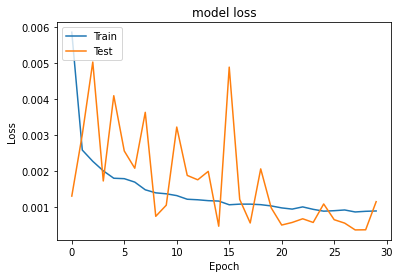

In [29]:
plot_his(history_1)

In [30]:
prediction = model_1.predict(X_test)
print(prediction[:10])

1519/1519 [==============================] - 1s 922us/step
[[0.02703466]
 [0.9549511 ]
 [0.9030586 ]
 [0.6874313 ]
 [0.9199291 ]
 [0.9274773 ]
 [0.58642703]
 [0.7182751 ]
 [0.01499132]
 [0.93923265]]


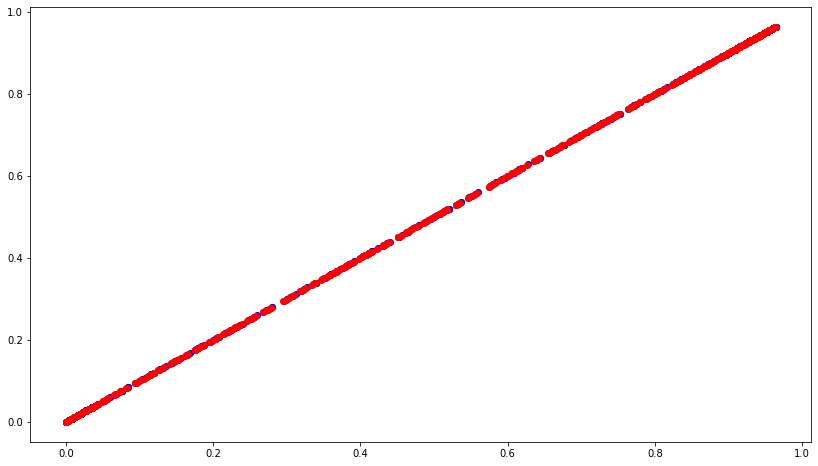

In [31]:
plt.figure(figsize=(14,8))
plt.scatter(Y_test[300:900], Y_test[300:900], color='blue')
plt.scatter(prediction[300:900], prediction[300:900], color='red')
plt.show()

## Model_1_1

In [42]:
tf.random.set_seed(42)

model__1_1 = tf.keras.Sequential([tf.keras.layers.Dense(100, activation='relu'),
                                  tf.keras.layers.Dense(50, activation='relu'),
                                  tf.keras.layers.Dense(20, activation = 'relu'),
                                  tf.keras.layers.Dense(1)])

model__1_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["mae"])

#here using callback feature
history_1_1 = model__1_1.fit(X_train,Y_train, epochs= 200,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/200
6073/6073 [==============================] - 13s 2ms/step - loss: 0.0048 - mae: 0.0048 - val_loss: 0.0027 - val_mae: 0.0027
Epoch 2/200
6073/6073 [==============================] - 17s 3ms/step - loss: 0.0026 - mae: 0.0026 - val_loss: 0.0023 - val_mae: 0.0023
Epoch 3/200
6073/6073 [==============================] - 13s 2ms/step - loss: 0.0022 - mae: 0.0022 - val_loss: 0.0012 - val_mae: 0.0012
Epoch 4/200
6073/6073 [==============================] - 11s 2ms/step - loss: 0.0020 - mae: 0.0020 - val_loss: 0.0013 - val_mae: 0.0013
Epoch 5/200
6073/6073 [==============================] - 11s 2ms/step - loss: 0.0019 - mae: 0.0019 - val_loss: 9.0364e-04 - val_mae: 9.0364e-04
Epoch 6/200
6073/6073 [==============================] - 11s 2ms/step - loss: 0.0018 - mae: 0.0018 - val_loss: 0.0022 - val_mae: 0.0022
Epoch 7/200
6073/6073 [==============================] - 12s 2ms/step - loss: 0.0016 - mae: 0.0016 - val_loss: 0.0043 - val_mae: 0.0043
Epoch 8/200
6073/6073 [=================

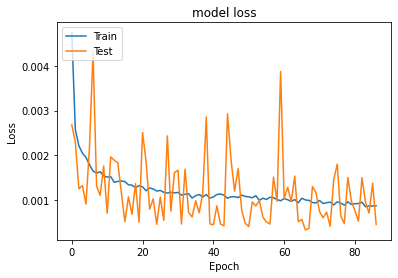

In [44]:
plot_his(history_1_1)

# LSTM
LSTM ( Long short term memory)


## Model 2

In [50]:
%%time
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([tf.keras.layers.LSTM(50,activation= 'relu',return_sequences=True, input_shape=(8,1)),
                               tf.keras.layers.LSTM(10,activation='relu'),
                               tf.keras.layers.Dense(1)])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ['mae'])

history_2 = model_2.fit(X_train,Y_train,epochs=40,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/40
6073/6073 [==============================] - 53s 8ms/step - loss: 0.0177 - mae: 0.0177 - val_loss: 0.0056 - val_mae: 0.0056
Epoch 2/40
6073/6073 [==============================] - 58s 9ms/step - loss: 0.0054 - mae: 0.0054 - val_loss: 0.0103 - val_mae: 0.0103
Epoch 3/40
6073/6073 [==============================] - 60s 10ms/step - loss: 0.0048 - mae: 0.0048 - val_loss: 0.0048 - val_mae: 0.0048
Epoch 4/40
6073/6073 [==============================] - 60s 10ms/step - loss: 0.0041 - mae: 0.0041 - val_loss: 0.0016 - val_mae: 0.0016
Epoch 5/40
6073/6073 [==============================] - 62s 10ms/step - loss: 0.0036 - mae: 0.0036 - val_loss: 0.0024 - val_mae: 0.0024
Epoch 6/40
6073/6073 [==============================] - 52s 8ms/step - loss: 0.0033 - mae: 0.0033 - val_loss: 0.0039 - val_mae: 0.0039
Epoch 7/40
6073/6073 [==============================] - 54s 9ms/step - loss: 0.0030 - mae: 0.0030 - val_loss: 0.0020 - val_mae: 0.0020
Epoch 8/40
6073/6073 [==============================

In [51]:
model_2.evaluate(X_test,Y_test)

1519/1519 [==============================] - 4s 3ms/step - loss: 8.3293e-04 - mae: 8.3293e-04


[0.0008329264237545431, 0.0008329264237545431]

In [52]:
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 8, 50)             10400     
                                                                 
 lstm_7 (LSTM)               (None, 10)                2440      
                                                                 
 dense_28 (Dense)            (None, 1)                 11        
                                                                 
Total params: 12,851
Trainable params: 12,851
Non-trainable params: 0
_________________________________________________________________


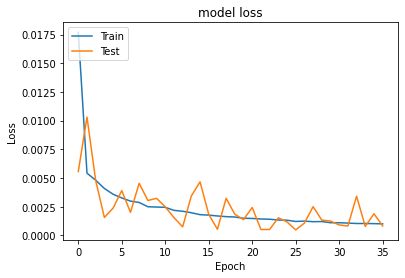

In [53]:
plot_his(history_2)

In [54]:
prediction_2 = model_2.predict(X_test)
print(prediction_2[:20])

1519/1519 [==============================] - 4s 3ms/step
[[0.02736638]
 [0.95636266]
 [0.90539604]
 [0.6873215 ]
 [0.92259246]
 [0.92982984]
 [0.5870489 ]
 [0.72029746]
 [0.0152736 ]
 [0.9417359 ]
 [0.21160957]
 [0.24843158]
 [0.9490122 ]
 [0.961603  ]
 [0.5846116 ]
 [0.9177786 ]
 [0.86491257]
 [0.9652886 ]
 [0.19594665]
 [0.9364731 ]]


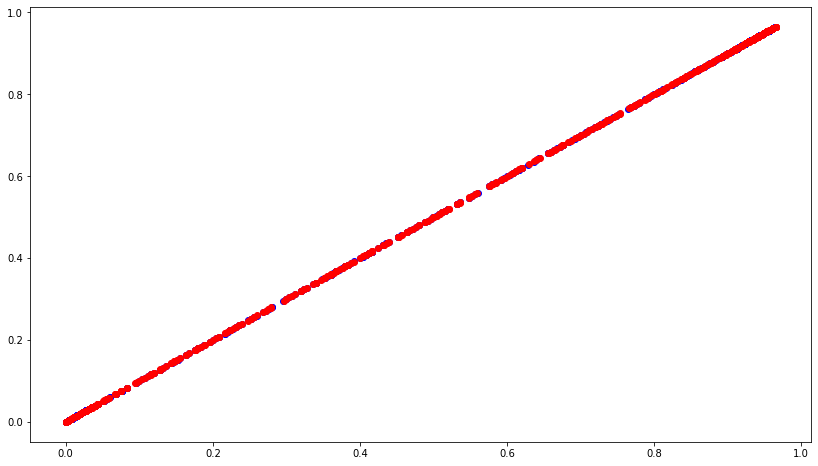

In [55]:
plt.figure(figsize=(14,8))
plt.scatter(Y_test[300:900], Y_test[300:900], color='blue')
plt.scatter(prediction_2[300:900], prediction_2[300:900], color='red')
plt.show()

## Model 3
Best

In [57]:
%%time
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([tf.keras.layers.LSTM(100,activation= 'relu',return_sequences=True, input_shape=(8,1)),
                               tf.keras.layers.LSTM(50,activation= 'relu',return_sequences=True),
                               tf.keras.layers.LSTM(30,activation='relu'),
                               tf.keras.layers.Dense(20,activation='relu'),
                               tf.keras.layers.Dense(1)])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ['mae'])

history_3 = model_3.fit(X_train,Y_train,epochs=40,validation_data=(X_test,Y_test))

Epoch 1/40
6073/6073 [==============================] - 98s 16ms/step - loss: 0.0213 - mae: 0.0213 - val_loss: 0.0207 - val_mae: 0.0207
Epoch 2/40
6073/6073 [==============================] - 94s 16ms/step - loss: 0.0080 - mae: 0.0080 - val_loss: 0.0023 - val_mae: 0.0023
Epoch 3/40
6073/6073 [==============================] - 93s 15ms/step - loss: 0.0057 - mae: 0.0057 - val_loss: 0.0060 - val_mae: 0.0060
Epoch 4/40
6073/6073 [==============================] - 93s 15ms/step - loss: 0.0047 - mae: 0.0047 - val_loss: 0.0017 - val_mae: 0.0017
Epoch 5/40
6073/6073 [==============================] - 94s 15ms/step - loss: 0.0041 - mae: 0.0041 - val_loss: 0.0023 - val_mae: 0.0023
Epoch 6/40
6073/6073 [==============================] - 93s 15ms/step - loss: 0.0036 - mae: 0.0036 - val_loss: 0.0020 - val_mae: 0.0020
Epoch 7/40
6073/6073 [==============================] - 94s 16ms/step - loss: 0.0031 - mae: 0.0031 - val_loss: 0.0026 - val_mae: 0.0026
Epoch 8/40
6073/6073 [==========================

In [58]:
model_3.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 8, 100)            40800     
                                                                 
 lstm_12 (LSTM)              (None, 8, 50)             30200     
                                                                 
 lstm_13 (LSTM)              (None, 30)                9720      
                                                                 
 dense_31 (Dense)            (None, 20)                620       
                                                                 
 dense_32 (Dense)            (None, 1)                 21        
                                                                 
Total params: 81,361
Trainable params: 81,361
Non-trainable params: 0
_________________________________________________________________


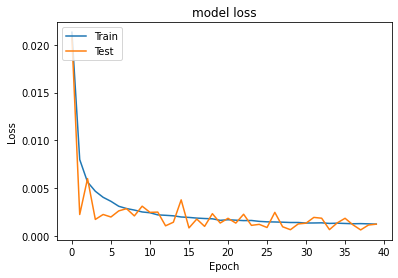

In [59]:
plot_his(history_3)

In [60]:
%%time
model_3.evaluate(X_test,Y_test)

1519/1519 [==============================] - 8s 5ms/step - loss: 0.0013 - mae: 0.0013
CPU times: user 11 s, sys: 467 ms, total: 11.5 s
Wall time: 7.77 s


[0.0012521222233772278, 0.0012521222233772278]

In [62]:
prediction_3 = model_3.predict(X_test)

1519/1519 [==============================] - 8s 5ms/step


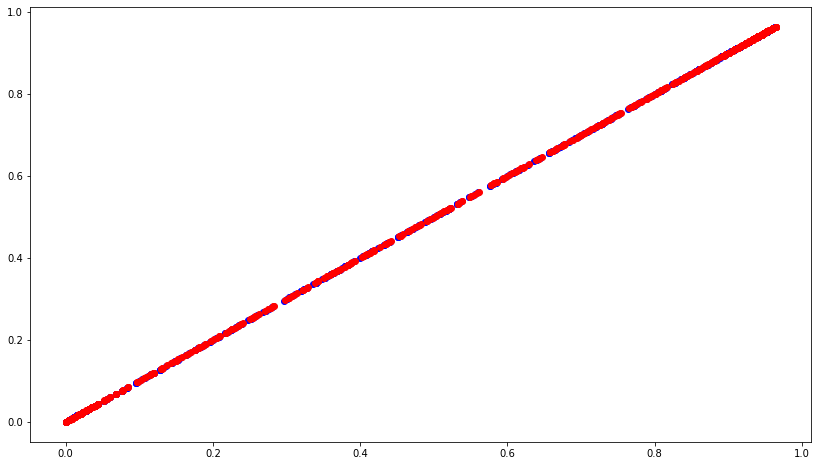

In [63]:
plt.figure(figsize=(14,8))
plt.scatter(Y_test[300:900], Y_test[300:900], color='blue')
plt.scatter(prediction_3[300:900], prediction_3[300:900], color='red')
plt.show()

# CNN

## Model 4
CNN

In [81]:
%%time
model_4 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,3,activation='relu',input_shape=(8,1)),
                               tf.keras.layers.Conv1D(10,3,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1)])

model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['mae'])

history_4 = model_4.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test),callbacks=callback)

Epoch 1/50
6073/6073 [==============================] - 13s 2ms/step - loss: 0.0071 - mae: 0.0071 - val_loss: 0.0043 - val_mae: 0.0043
Epoch 2/50
6073/6073 [==============================] - 13s 2ms/step - loss: 0.0015 - mae: 0.0015 - val_loss: 0.0033 - val_mae: 0.0033
Epoch 3/50
6073/6073 [==============================] - 12s 2ms/step - loss: 0.0014 - mae: 0.0014 - val_loss: 0.0018 - val_mae: 0.0018
Epoch 4/50
6073/6073 [==============================] - 12s 2ms/step - loss: 0.0013 - mae: 0.0013 - val_loss: 0.0019 - val_mae: 0.0019
Epoch 5/50
6073/6073 [==============================] - 13s 2ms/step - loss: 0.0013 - mae: 0.0013 - val_loss: 0.0015 - val_mae: 0.0015
Epoch 6/50
6073/6073 [==============================] - 12s 2ms/step - loss: 0.0013 - mae: 0.0013 - val_loss: 7.0979e-04 - val_mae: 7.0979e-04
Epoch 7/50
6073/6073 [==============================] - 11s 2ms/step - loss: 0.0012 - mae: 0.0012 - val_loss: 0.0012 - val_mae: 0.0012
Epoch 8/50
6073/6073 [=========================

In [82]:
model_4.evaluate(X_test,Y_test)

1519/1519 [==============================] - 2s 1ms/step - loss: 6.7884e-04 - mae: 6.7884e-04


[0.0006788375321775675, 0.0006788375321775675]

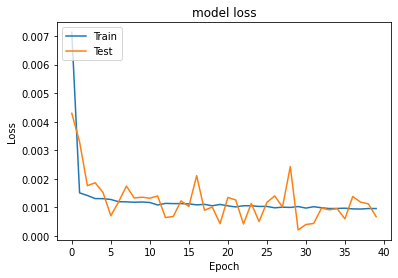

In [83]:
plot_his(history_4)

In [84]:
prediction_4 = model_4.predict(X_test)

1519/1519 [==============================] - 2s 1ms/step


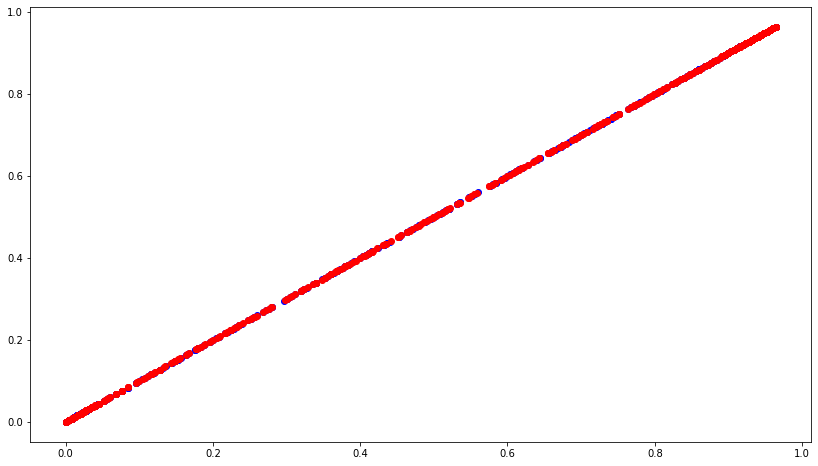

In [85]:
plt.figure(figsize=(14,8))
plt.scatter(Y_test[300:900], Y_test[300:900], color='blue')
plt.scatter(prediction_4[300:900], prediction_4[300:900], color='red')
plt.show()

## Model 5

In [89]:
%%time
model_5 = tf.keras.Sequential([tf.keras.layers.Conv1D(30,3,activation='relu',input_shape=(8,1)),
                               tf.keras.layers.Conv1D(10,3,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(16,activation='relu'),
                               tf.keras.layers.Dense(1)])

model_5.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['mae'])

history_5 = model_5.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test))

Epoch 1/50
6073/6073 [==============================] - 15s 2ms/step - loss: 0.0048 - mae: 0.0048 - val_loss: 0.0035 - val_mae: 0.0035
Epoch 2/50
6073/6073 [==============================] - 13s 2ms/step - loss: 0.0025 - mae: 0.0025 - val_loss: 0.0050 - val_mae: 0.0050
Epoch 3/50
6073/6073 [==============================] - 13s 2ms/step - loss: 0.0024 - mae: 0.0024 - val_loss: 9.8077e-04 - val_mae: 9.8077e-04
Epoch 4/50
6073/6073 [==============================] - 13s 2ms/step - loss: 0.0022 - mae: 0.0022 - val_loss: 0.0031 - val_mae: 0.0031
Epoch 5/50
6073/6073 [==============================] - 15s 2ms/step - loss: 0.0021 - mae: 0.0021 - val_loss: 0.0030 - val_mae: 0.0030
Epoch 6/50
6073/6073 [==============================] - 15s 2ms/step - loss: 0.0020 - mae: 0.0020 - val_loss: 9.0685e-04 - val_mae: 9.0685e-04
Epoch 7/50
6073/6073 [==============================] - 13s 2ms/step - loss: 0.0019 - mae: 0.0019 - val_loss: 8.6224e-04 - val_mae: 8.6224e-04
Epoch 8/50
6073/6073 [=========

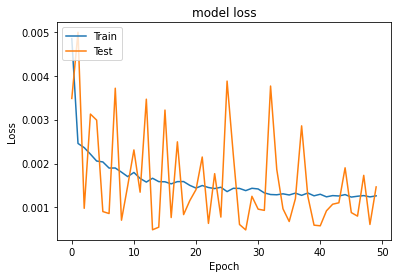

In [90]:
plot_his(history_5)

In [91]:
prediction_5 = model_5.predict(X_test)

1519/1519 [==============================] - 2s 1ms/step


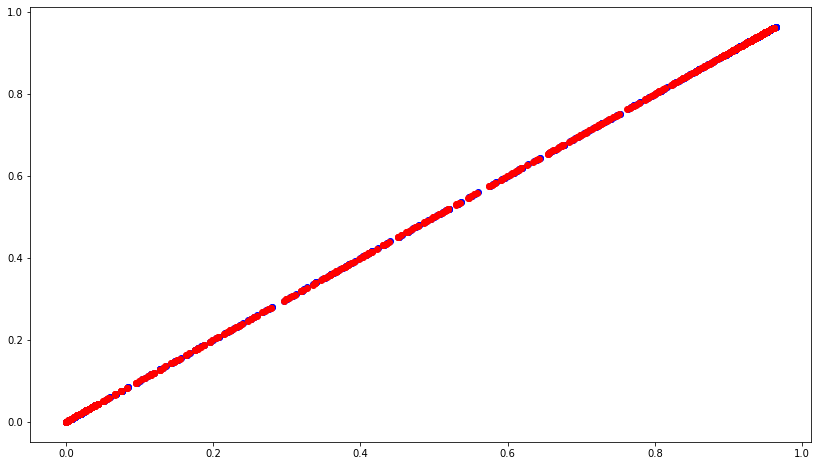

In [92]:
plt.figure(figsize=(14,8))
plt.scatter(Y_test[300:900], Y_test[300:900], color='blue')
plt.scatter(prediction_5[300:900], prediction_5[300:900], color='red')
plt.show()

## Model 6

In [ ]:
%%time
model_6 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,3,activation='relu',input_shape=(8,1)),
                               tf.keras.layers.Conv1D(10,2,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(16,activation="relu"),
                               tf.keras.layers.Dense(1)])

model_6.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['mae'])

history_6 = model_6.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test))

Epoch 1/100
6073/6073 [==============================] - 22s 3ms/step - loss: 0.0056 - mae: 0.0056 - val_loss: 0.0029 - val_mae: 0.0029
Epoch 2/100
6073/6073 [==============================] - 21s 3ms/step - loss: 0.0024 - mae: 0.0024 - val_loss: 0.0042 - val_mae: 0.0042
Epoch 3/100
6073/6073 [==============================] - 21s 3ms/step - loss: 0.0022 - mae: 0.0022 - val_loss: 0.0024 - val_mae: 0.0024
Epoch 4/100
6073/6073 [==============================] - 21s 3ms/step - loss: 0.0020 - mae: 0.0020 - val_loss: 5.5763e-04 - val_mae: 5.5763e-04
Epoch 5/100
6073/6073 [==============================] - 21s 3ms/step - loss: 0.0018 - mae: 0.0018 - val_loss: 0.0040 - val_mae: 0.0040
Epoch 6/100
6073/6073 [==============================] - 21s 3ms/step - loss: 0.0018 - mae: 0.0018 - val_loss: 0.0025 - val_mae: 0.0025
Epoch 7/100
6073/6073 [==============================] - 21s 3ms/step - loss: 0.0016 - mae: 0.0016 - val_loss: 0.0014 - val_mae: 0.0014
Epoch 8/100
6073/6073 [=================

In [ ]:
model_6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 5, 10)             50        
                                                                 
 conv1d_3 (Conv1D)           (None, 4, 3)              63        
                                                                 
 flatten_1 (Flatten)         (None, 12)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                416       
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 562
Trainable params: 562
Non-trainable params: 0
_________________________________________________________________


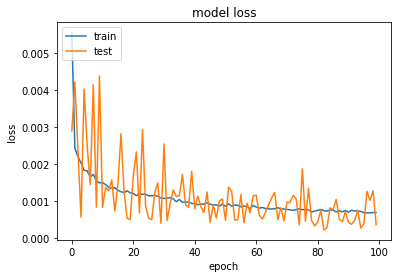

In [ ]:
plt.plot(history_6.history['loss'])
plt.plot(history_6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1519/1519 [==============================] - 2s 2ms/step


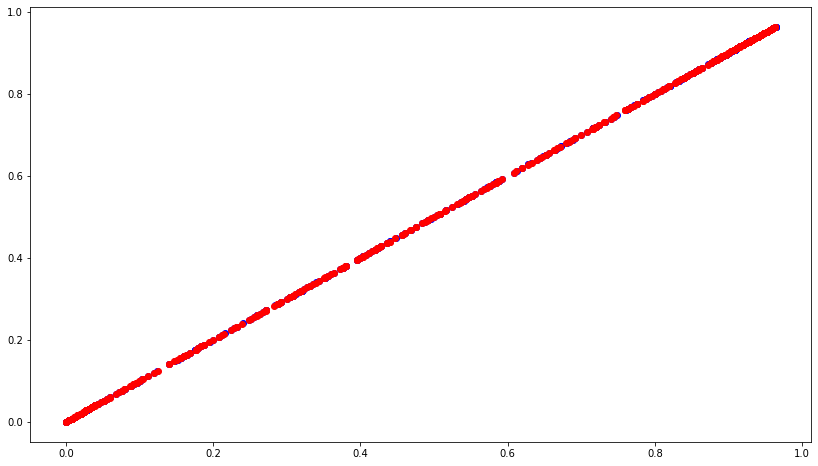

In [ ]:
prediction_6 = model_6.predict(X_test)
plt.figure(figsize=(14,8))
plt.scatter(Y_test[300:900], Y_test[300:900], color='blue')
plt.scatter(prediction_6[300:900], prediction_6[300:900], color='red')
plt.show()

## Model 7

In [98]:
%%time
model_7 = tf.keras.Sequential([tf.keras.layers.Conv1D(64,3,activation='relu',input_shape=(8,1)),
                               tf.keras.layers.Conv1D(32,2,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(32,activation="relu"),
                               tf.keras.layers.Dense(16,activation="relu"),
                               tf.keras.layers.Dense(1)])

model_7.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['mae'])

history_7 = model_7.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks=callback)

Epoch 1/100
6073/6073 [==============================] - 17s 3ms/step - loss: 0.0127 - mae: 0.0127 - val_loss: 0.0015 - val_mae: 0.0015
Epoch 2/100
6073/6073 [==============================] - 16s 3ms/step - loss: 8.4254e-04 - mae: 8.4254e-04 - val_loss: 0.0011 - val_mae: 0.0011
Epoch 3/100
6073/6073 [==============================] - 18s 3ms/step - loss: 7.6762e-04 - mae: 7.6762e-04 - val_loss: 0.0012 - val_mae: 0.0012
Epoch 4/100
6073/6073 [==============================] - 16s 3ms/step - loss: 7.3954e-04 - mae: 7.3954e-04 - val_loss: 9.0057e-04 - val_mae: 9.0057e-04
Epoch 5/100
6073/6073 [==============================] - 18s 3ms/step - loss: 7.8270e-04 - mae: 7.8270e-04 - val_loss: 0.0018 - val_mae: 0.0018
Epoch 6/100
6073/6073 [==============================] - 17s 3ms/step - loss: 7.4783e-04 - mae: 7.4783e-04 - val_loss: 0.0016 - val_mae: 0.0016
Epoch 7/100
6073/6073 [==============================] - 17s 3ms/step - loss: 7.0960e-04 - mae: 7.0960e-04 - val_loss: 9.8255e-04 - val_

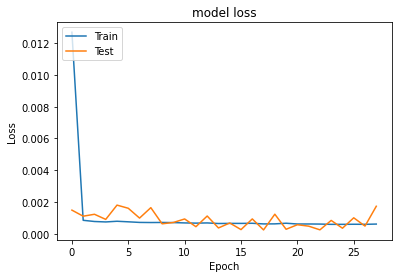

In [99]:
plot_his(history_7)

1519/1519 [==============================] - 2s 1ms/step


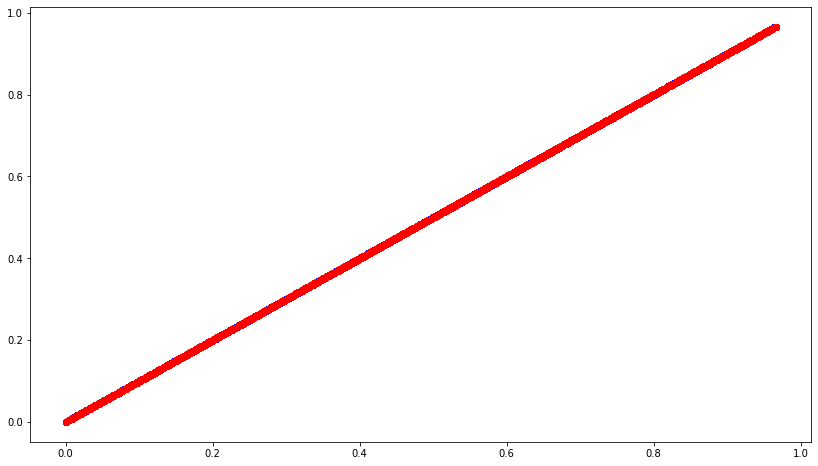

In [100]:
prediction_7 = model_7.predict(X_test)
plt.figure(figsize=(14,8))
plt.scatter(Y_test, Y_test, color='blue')
plt.scatter(prediction_7, prediction_7, color='red')
plt.show()

# GPR
GAUSSIAN PROCESS REGRESSION
link - https://www.kaggle.com/code/residentmario/gaussian-process-regression-and-classification

Link_1 = https://www.kaggle.com/discussions/questions-and-answers/47716

Link_2 = https://www.kaggle.com/code/residentmario/gaussian-process-regression-and-classification

Link_3 = https://www.kaggle.com/code/sterby/gaussian-process-regression-benchmark


# SVR
Support vector regressor

In [ ]:
from sklearn.svm import SVR, LinearSVR

In [ ]:
svr = SVR().fit(X, Y)
print(svr)

SVR()


In [ ]:
y_pred_svr = svr.predict(X)

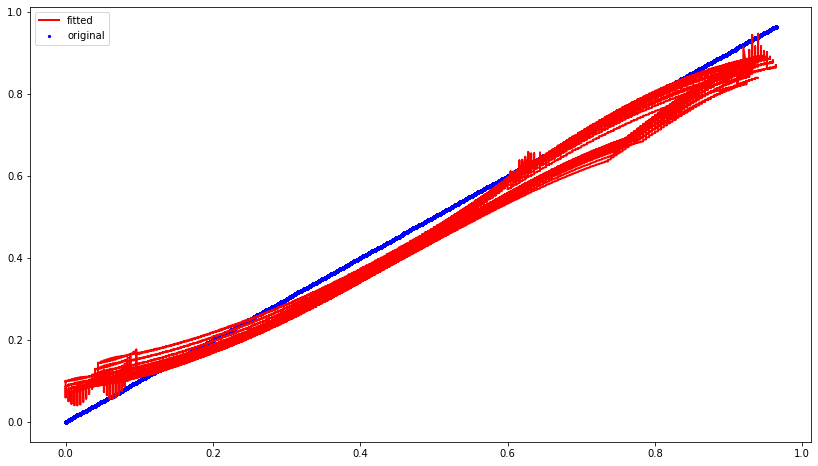

In [ ]:
plt.figure(figsize=(14,8))
plt.scatter(Y, Y, s=5, color="blue", label="original")
plt.plot(Y, y_pred_svr, lw=2, color="red", label="fitted")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
score = svr.score(X,Y)
print("R-squared:", score)
print("MSE:", mean_squared_error(Y, y_pred_svr))

R-squared: 0.9766601932530652
MSE: 0.0029213341417970804


In [ ]:
kernel = ['linear','rbf']        # For both the kernel
for i in kernel:
  model = SVR(kernel=i,C=1.0)
  model.fit(X_train,Y_train)
  print(f"For Kernel {i}")
  print("Accuracy is :", model.score(X_test,Y_test))

For Kernel linear
Accuracy is : 0.9540766441060804
For Kernel rbf
Accuracy is : 0.9769426754300402


# RandomForest

link_1 = https://levelup.gitconnected.com/random-forest-regression-209c0f354c84

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [68]:
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)
y_pred_rf = rf.predict(X_test)

In [69]:
rf.score(X_test,Y_test)

0.9999999991947186

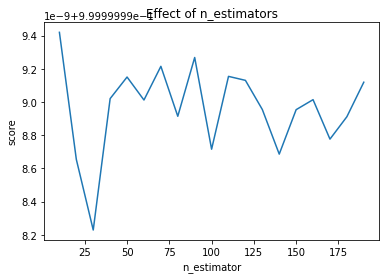

In [71]:
model = RandomForestRegressor()
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, Y_train)
    scores.append(model.score(X_test, Y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [73]:
for i in scores:
  print(f"score is : {i}")

score is : 0.9999999994195219
score is : 0.9999999986543462
score is : 0.9999999982292486
score is : 0.9999999990204432
score is : 0.9999999991503912
score is : 0.9999999990120145
score is : 0.9999999992149007
score is : 0.9999999989140772
score is : 0.9999999992680504
score is : 0.9999999987158241
score is : 0.9999999991543599
score is : 0.9999999991303823
score is : 0.9999999989547335
score is : 0.999999998686251
score is : 0.9999999989538495
score is : 0.999999999014156
score is : 0.999999998776504
score is : 0.9999999989113593
score is : 0.9999999991191234
